![](./img/sktime-logo-text-horizontal.jpg)

### Agenda for today

1. General introduction to `sklearn`, `sktime`, `skpro`

2. High-level introduction to probabilistic prediction - interface and methodological

3. `skpro` advanced features - feature extraction, tuning, autoML

4. probabilistic forecasting with `sktime`

### Running the notebooks

all notebooks available on `github.com/sktime`

repository: `github.com/sktime/sktime-tutorial-pydata-Amsterdam-2023`

* README instructions to run notebooks locally
* binder to run notebooks in the cloud (if wifi allows)

help, Q&A, developer chat in [`sktime` tutorial discord thread](https://discord.com/channels/1120766458528542794/1130170803137282118)

## 1 - Introduction to ``sktime`` & ``skpro``

### 1.1 What is ``sktime``, ``skpro``?

- [`sktime`](https://www.sktime.net/en/latest/index.html) is a python library for time series learning tasks!
  - check [our website](https://www.sktime.net/en/latest/index.html)
  - integrative framework layer in the time series space

- [`skpro`](https://skpro.readthedocs.io/en/latest/) is a python library for tabular probabilistic regression and probability distributions
    - `sktime` spin-off, rearchitecture of earlier package using `skbase`
    - maintained by the `sktime` community

- `sklearn` / `sktime` / `skpro` design principles:
  - unified interface for objects/estimators
  - modular design, strategy pattern
  - composable, composites are interface homogenous
  - simple specification language and parameter interface

- `sktime` is a vibrant, welcoming community with mentoring opportunities!
  - We *love* new contributors. Especially if you are new to open source!
      - join the ``sktime`` sprint this week-end at pydata Amsterdam! Gentle intro to contributing!
  - Check out the ``sktime`` [new contributors guide](https://www.sktime.net/en/latest/get_involved/contributing.html)
  - join our [discord](https://discord.com/invite/54ACzaFsn7) and/or one of our regular meetups!
  - follow us on [LinkedIn](https://www.linkedin.com/company/scikit-time/)!
  - star us on [GitHub](https://github.com/sktime/sktime)!

### 1.2 sklearn unified interface - the strategy pattern

`sklearn` provides a unified interface to multiple learning tasks including classification, regression.

any (supervised) estimator has the following interface points

1. **Instantiate** your model of choice, with parameter settings
2. **Fit** the instance of your model
3. Use that fitted instance to **predict** new data!

![](./img/estimator-conceptual-model.jpg)

In [1]:
# get data to use the model on
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# data are pd.DataFrame/pd.Series
# X_train.shape = (112, 4)  - 112 train flowers times 4 features
#                             sepal length, sepal width, petal length, petal width
# y_train.shape = (112,)    - 112 categorical labels  - one of 3 flower types 0, 1, 2
# X_test.shape = (38, 4)  - 38 test flowers times 4 features
# y_test.shape = (38,)    - 38 cagetorical labels - one of 3 flower types


In [2]:
from sklearn.svm import SVC

# 1. Instantiate SVC with parameters gamma, C
clf = SVC(gamma=0.001, C=100.)
# clf is an instance of SVC now

# 2. Fit clf to training data = 112 feature/label pairs
clf.fit(X_train, y_train)
# clf changes state to "fitted", computes model

# 3. Predict labels on test data = 38 feature vectors
y_test_pred = clf.predict(X_test)
# produces predictions for the test data, 38 labels

y_test_pred
# y_test_pred.shape = (38,)

array([1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2])

IMPORTANT: to use another classifier, only the specification line, part 1 changes!

`SVC` could have been `RandomForest`, steps 2 and 3 remain the same - unified interface:

In [3]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate SVC with parameters gamma, C
clf = RandomForestClassifier(n_estimators=100)

# 2. Fit clf to training data
clf.fit(X_train, y_train)

# 3. Predict labels on test data
y_test_pred = clf.predict(X_test)

y_test_pred

array([1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2])

in object oriented design terminology, this is called **"strategy pattern"**

= different estimators can be switched out without change to the interface

= like a power plug adapter, it's plug&play if it conforms with the interface

Pictorial summary:
![](./img/sklearn-unified-interface.jpg)

`sklearn` estimators are parametric:

all parameters in the "blueprint" accessed and set via `get_params`, `set_params`:

In [4]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 1.3 `sktime` is devoted to time-series data analysis

Richer space of time series tasks, compared to "tabular":

- **Forecasting** - predict energy consumption tomorrow, based on past weeks
- **Classification** - classify electrocardiograms to healthy/sick, based on prior examples
- **Regression** - predict compound purity in bioreactor based on temperature/pressure profile
- **Clustering** - sort outlines of tree leaves into a small number of similar classes
- **Annotation** - identify jumps, anomalies, events in a data stream

`sktime` aims to provide `sklearn`-like, modular, composable, interfaces for these!

| Task | Status | Links |
|---|---|---|
| **Forecasting** | stable | [Tutorial](https://www.sktime.net/en/latest/examples/01_forecasting.html) · [API Reference](https://www.sktime.net/en/latest/api_reference/forecasting.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/forecasting.py)  |
| **Time Series Classification** | stable | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/02_classification.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/classification.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/classification.py) |
| **Time Series Regression** | stable | [API Reference](https://www.sktime.net/en/latest/api_reference/regression.html) |
| **Transformations** | stable | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/03_transformers.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/transformations.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/transformer.py)  |
| **Parameter fitting** | maturing | [API Reference](https://www.sktime.net/en/latest/api_reference/param_est.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/transformer.py)  |
| **Time Series Clustering** | maturing | [API Reference](https://www.sktime.net/en/latest/api_reference/clustering.html) ·  [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/clustering.py) |
| **Time Series Distances/Kernels** | maturing | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/03_transformers.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/dists_kernels.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/dist_kern_panel.py) |
| **Annotation** | experimental | [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/annotation.py) |
| **Distributions and simulation** | experimental |  |

Example - forecasting

![](./img/tasks-forecasting.png)

In [5]:
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
import numpy as np

# step 1: data specification
y = load_airline()
# y = pandas.Series, y.shape = (150,)
# 150 months of monthly observations

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)
# we want to forecast 36 months = 3 years

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y, fh=fh)

# step 5: querying predictions
y_pred = forecaster.predict()
# y_pred is a "continuation" of y
# y_pred.shape = (36,) = forecasts for 36 months

or, probabilistic forecast, e.g., interval forecast:

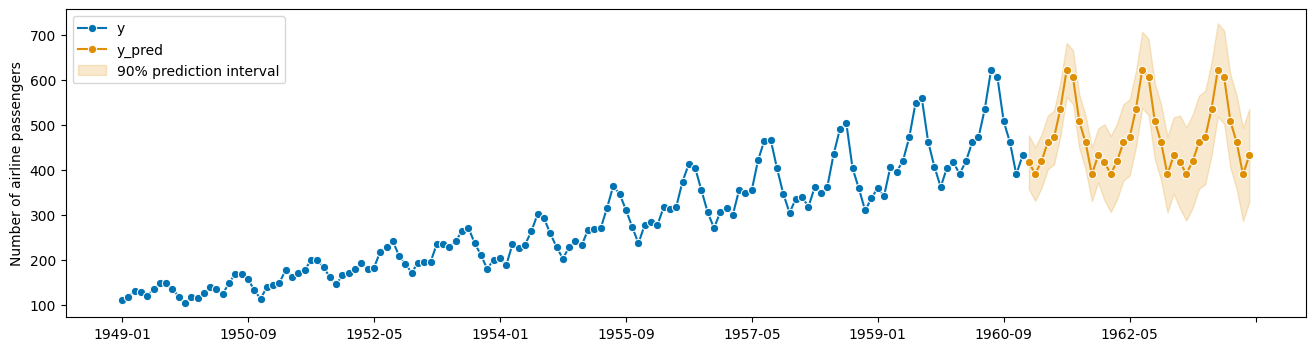

In [6]:
from sktime.utils import plotting

# aprobabilistic forecast - interval forecast
y_pred_int = forecaster.predict_interval()

fig, ax = plotting.plot_series(
    y, y_pred, labels=["y", "y_pred"], pred_interval=y_pred_int
)

### 1.4 `sktime` integrates the time series modelling ecosystem!

the package space for time series is highly fragmented:

* lots of great implementations and methods out there!
* but many different interfaces, not composable like `sklearn`

`sktime` integrates the ecosystem - in friendly collaboration with all the packages out there!

* unified interface standard
* highly composable
* mini-package manager on estiator/module level
* easily extensible - 3rd party plugins, other packages

![](./img/unified_framework.png)

### 1.5 What are probabilistic predictions?

![](./img/predict_proba.jpg)

today: probabilistic predictions of *numbers*

* tabular: probabilistic regression
* sequential: probabilistic forecasting

example from above: predictive intervals

In [7]:
y_pred_int.head()
# in 90% of cases (90% nominal predictive coverage)
# in 1961 Jan
# the number of passengers will be between 357 and 476

Number of airline passengers            
                                 0.9            
                               lower       upper
1961-01                   357.265915  476.734085
1961-02                   331.265915  450.734085
1961-03                   359.265915  478.734085
1961-04                   401.265915  520.734085
1961-05                   412.265915  531.734085

Good to know no.1:

probabilistic predictions are not always correct,

we need to evaluate them just like point preds

![](./img/predict_proba_good.jpg)

Good to know no.2:

metrics compare the above with the actual - actual is not probabilistic

![](./img/proba_loss.jpg)

therefore, `skpro` and `sktime` provide:

* performance metrics for probabilistic predictions
* model selection (grid tuning etc) via metrics
* evaluation and benchmark for probabilistic predictions

just like one would expect from best practice :-)

### 1.6 Summary/What is next!

- `sklearn` interface: unified interface (strategy pattern), modular, composition stable, easy specification language
- `sktime` evolves the interface for time series learning tasks
- `sktime` integrates a fragmented ecosytem with interface, composability, dependency management
- `skpro` covers tabular probabilistic regression, tabular probability distributions

- today:
    * deep dive `skpro`
        * probabilistic predictions, metrics
        * tuning, pipelines, reductions to turn an `sklearn` regressor proba
    * probabilistic forecasting with `sktime`

---
### Credits: notebook 1 - `sktime` intro

notebook creation: fkiraly, marrov

some vignettes based on existing `sktime` tutorials, credit: fkiraly, miraep8

slides (png/jpg):

* from fkiraly's postgraduate course at UCL, Principles and Patterns in Data Scientific Software Engineering
* from fkiraly's presentations on probabilistic supervised learning, `sktime` and `skpro`
* ecosystem slide: fkiraly, mloning
* "forecasting" picture: fkiraly, mloning

General credit also to `sklearn` and `sktime` contributors